<a href="https://colab.research.google.com/github/bsebast2/AppliedMLProject/blob/main/Applied_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied ML Project: Financial Distress Prediction Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import streamlit as st
%matplotlib inline
#%matplotlib notebook    
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import scipy.stats as stats


## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importing Dataset


In [ ]:
df = pd.read_csv('/content/Financial Distress.csv')
df 

Company  Time  Financial Distress      x1  ...  x80       x81  x82  x83
0           1     1            0.010636  1.2810  ...   22  0.060390   30   49
1           1     2           -0.455970  1.2700  ...   22  0.010636   31   50
2           1     3           -0.325390  1.0529  ...   22 -0.455970   32   51
3           1     4           -0.566570  1.1131  ...   22 -0.325390   33   52
4           2     1            1.357300  1.0623  ...   29  1.251000    7   27
...       ...   ...                 ...     ...  ...  ...       ...  ...  ...
3667      422    10            0.438020  2.2605  ...   37  0.436380    4   41
3668      422    11            0.482410  1.9615  ...   37  0.438020    5   42
3669      422    12            0.500770  1.7099  ...   37  0.482410    6   43
3670      422    13            0.611030  1.5590  ...   37  0.500770    7   44
3671      422    14            0.518650  1.6148  ...   37  0.611030    8   45

[3672 rows x 86 columns]

In [ ]:
pd.concat((df['Company'],df['x80'])  #you can see x80 being redundant

0         1
1         1
2         1
3         1
4         2
       ... 
3667    422
3668    422
3669    422
3670    422
3671    422
Name: Company, Length: 3672, dtype: int64

**Removing Company, Time columns, x80**

In [ ]:
df1 = df.iloc[:, 2:]
df1 = df1.drop('x80', axis =1)  
df1

Financial Distress      x1        x2       x3  ...  x80       x81  x82  x83
0               0.010636  1.2810  0.022934  0.87454  ...   22  0.060390   30   49
1              -0.455970  1.2700  0.006454  0.82067  ...   22  0.010636   31   50
2              -0.325390  1.0529 -0.059379  0.92242  ...   22 -0.455970   32   51
3              -0.566570  1.1131 -0.015229  0.85888  ...   22 -0.325390   33   52
4               1.357300  1.0623  0.107020  0.81460  ...   29  1.251000    7   27
...                  ...     ...       ...      ...  ...  ...       ...  ...  ...
3667            0.438020  2.2605  0.202890  0.16037  ...   37  0.436380    4   41
3668            0.482410  1.9615  0.216440  0.20095  ...   37  0.438020    5   42
3669            0.500770  1.7099  0.207970  0.26136  ...   37  0.482410    6   43
3670            0.611030  1.5590  0.185450  0.30728  ...   37  0.500770    7   44
3671            0.518650  1.6148  0.176760  0.36369  ...   37  0.611030    8   45

[3672 rows x 84 columns]

**Checking for null or missing value**

In [ ]:
df1.isnull().values.any() # no null or missing values  

False

**Descriptive Statistics**

In [ ]:
def desc_stats():
  ds = df1.describe()
  temp  = pd.concat([df1.skew(), df1.kurtosis()], axis = 1)
  temp.columns = ['skewness', 'kurtosis']
  temp = temp.T
  stats = pd.concat([ds, temp])
  return stats
#cell_text = []
#for row in range(len(stats)):
 #   cell_text.append(stats.iloc[row])
#the_table = plt.table(cellText=cell_text, colLabels=stats.columns, loc='center')
#the_table.auto_set_font_size(False)
#the_table.set_fontsize(24)
#the_table.scale(40, 40)
#plt.axis('off')
#plt.show();

Financial Distress           x1  ...          x82          x83
count            3672.000000  3672.000000  ...  3672.000000  3672.000000
mean                1.040257     1.387820  ...    13.122277    33.044935
std                 2.652227     1.452926  ...     9.465907    13.714563
min                -8.631700     0.075170  ...     1.000000     2.000000
25%                 0.172275     0.952145  ...     6.000000    21.000000
50%                 0.583805     1.183600  ...    11.000000    34.000000
75%                 1.351750     1.506475  ...    17.000000    44.000000
max               128.400000    51.954000  ...    49.000000    74.000000
skewness           30.873600    20.058157  ...     1.156911    -0.023812
kurtosis         1451.206671   579.289645  ...     1.039430    -0.924160

[10 rows x 84 columns]

**Plotting Histogram and Box plots for all Features and Target Variable**

In [ ]:
df1.hist(figsize=(25,70), bins = 20);

In [ ]:
df1.plot(kind='box', subplots=True, layout=(23,4), sharex=False, sharey=False, fontsize= 12, figsize = (25, 70))
plt.show()

In [ ]:
def plot_feature(df, clmn_name):
  '''Function for generating plots for a given Feature given df and column_name'''
  plt.figure(figsize=(10,6))
  plt.subplot(121)
  df[clmn_name].hist(bins = 100, grid = False)
  plt.subplot(122)
  plt.violinplot(df[clmn_name])
  plt.show()

# Scaling Data

In [ ]:
scaler=StandardScaler()
model = scaler.fit(df1)
scaled_data=pd.DataFrame(model.transform(df1))
scaled_data.columns=df1.columns



In [ ]:
scaled_data

Financial Distress        x1        x2  ...       x81       x82       x83
0              -0.388263 -0.073530 -0.889790  ... -0.390080  1.783244  1.163525
1              -0.564217 -0.081102 -1.027125  ... -0.408740  1.888901  1.236450
2              -0.514976 -0.230545 -1.575751  ... -0.583737  1.994557  1.309375
3              -0.605923 -0.189106 -1.207824  ... -0.534764  2.100214  1.382300
4               0.119555 -0.224075 -0.189054  ...  0.056448 -0.646859 -0.440828
...                  ...       ...       ...  ...       ...       ...       ...
3667           -0.227099  0.600718  0.609885  ... -0.249068 -0.963829  0.580124
3668           -0.210360  0.394899  0.722805  ... -0.248453 -0.858173  0.653049
3669           -0.203437  0.221707  0.652220  ... -0.231805 -0.752516  0.725974
3670           -0.161858  0.117834  0.464548  ... -0.224919 -0.646859  0.798899
3671           -0.196694  0.156244  0.392129  ... -0.183567 -0.541203  0.871825

[3672 rows x 84 columns]

**Plotting Scaled data Histogram and Box plots**

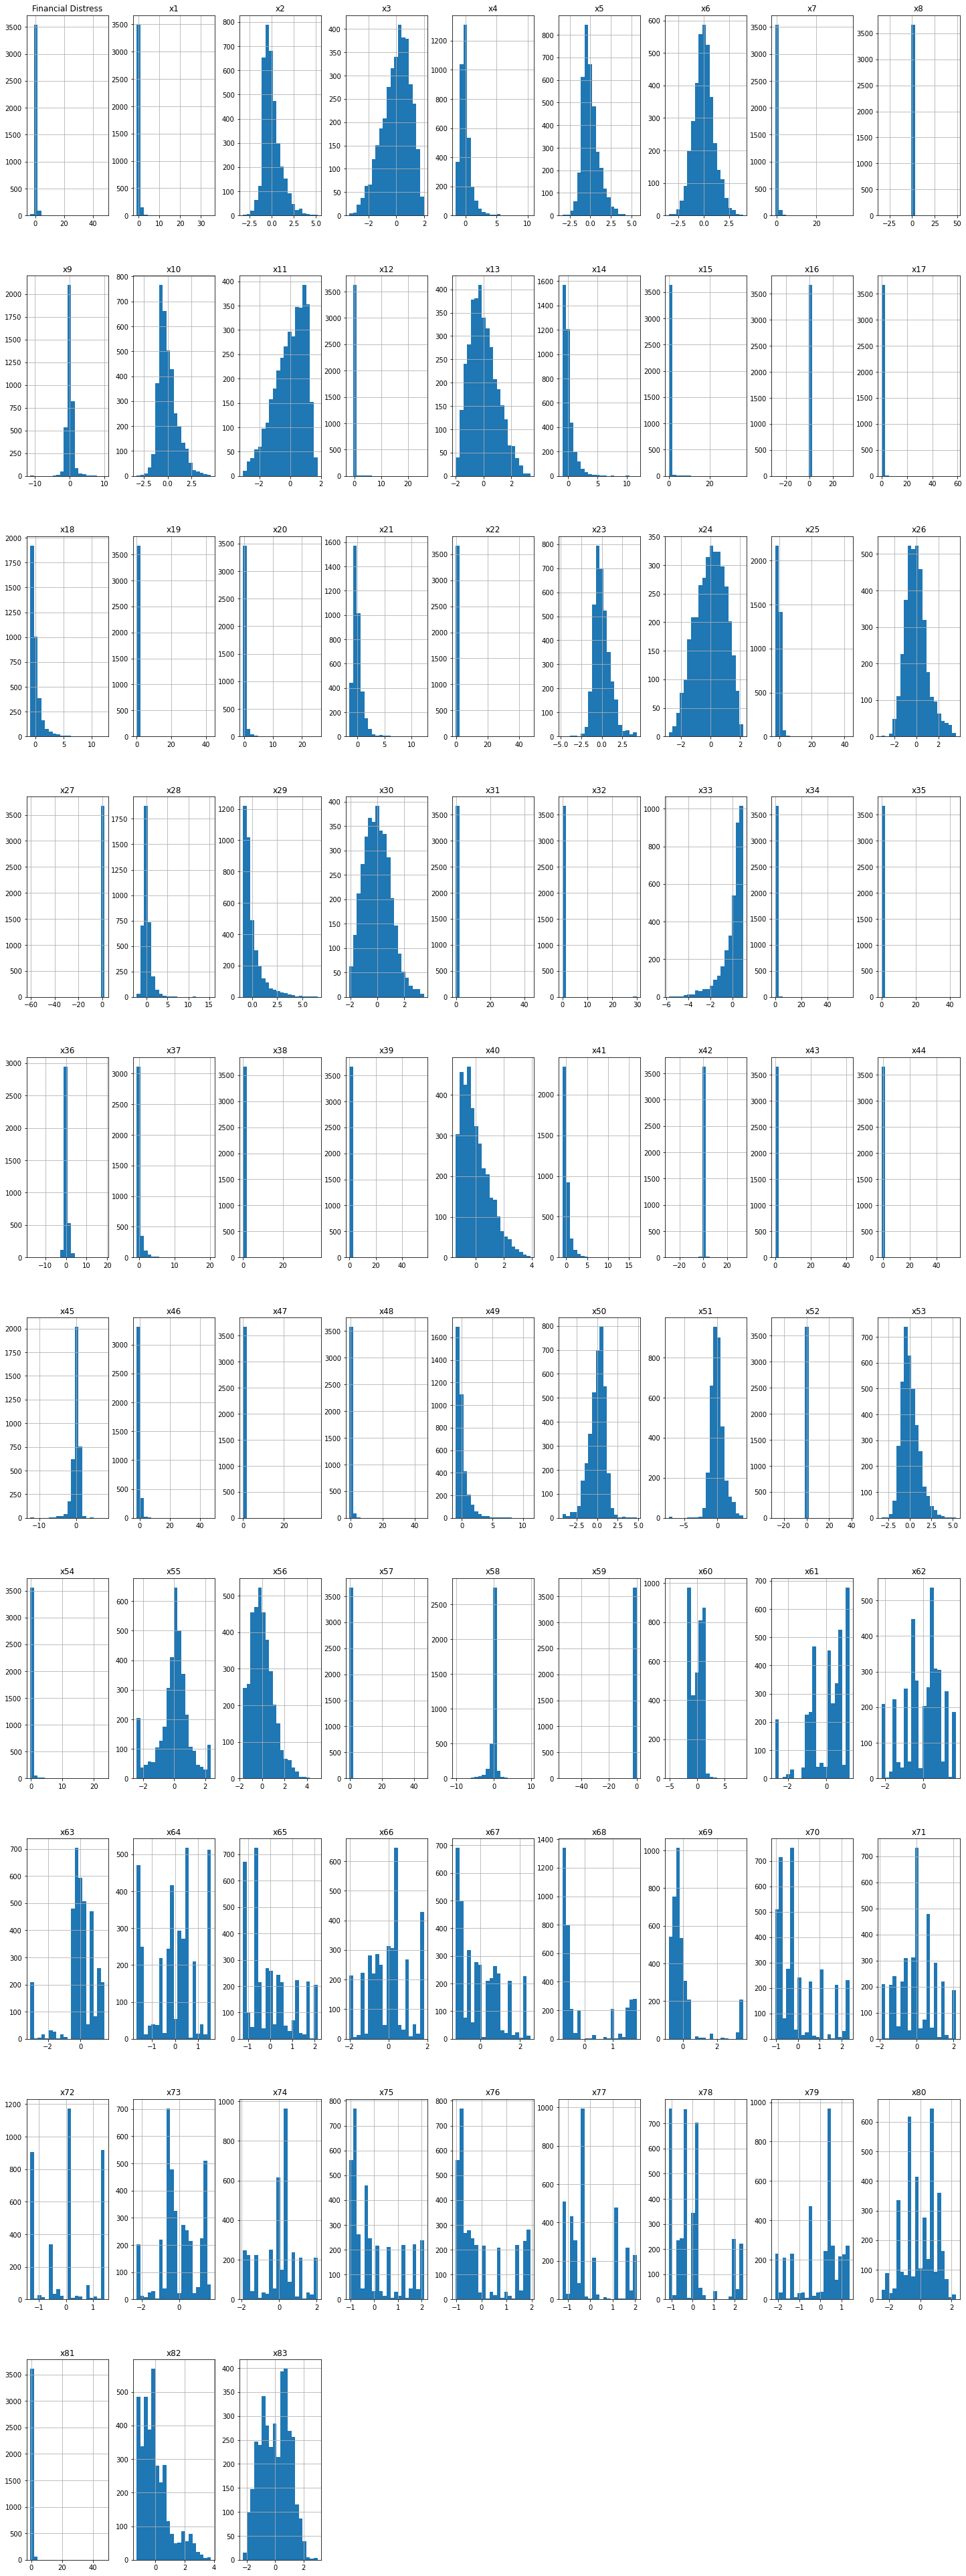

In [ ]:
scaled_data.hist(figsize=(25,70), bins = 20);

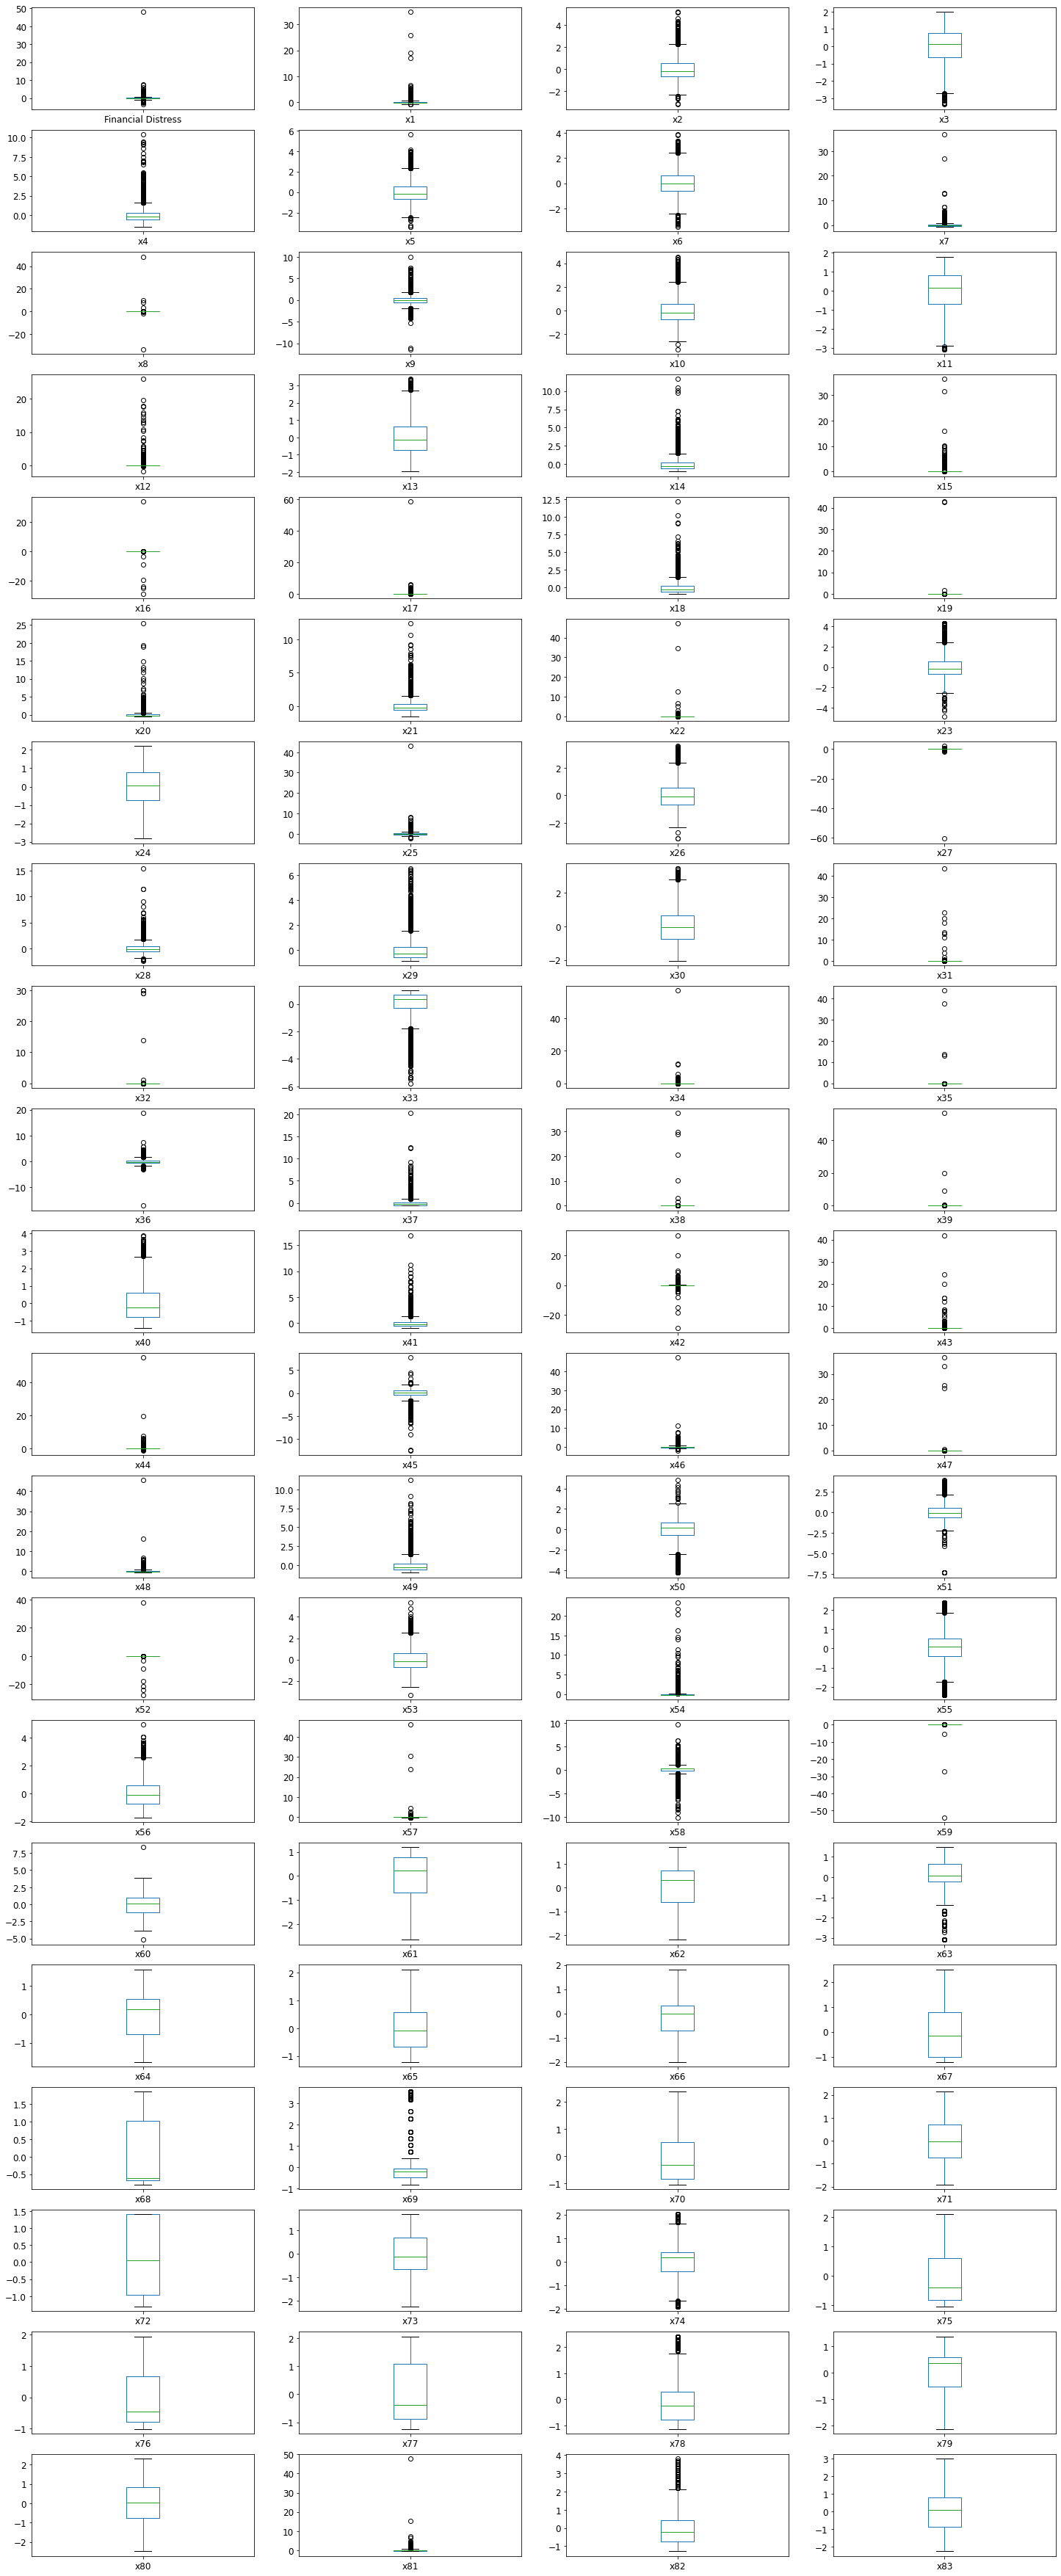

In [ ]:
scaled_data.plot(kind='box', subplots=True, layout=(23,4), sharex=False, sharey=False, fontsize= 12, figsize = (25, 70));

# Outliers 

In [ ]:

Q1=scaled_data.quantile(q=0.25)
Q3=scaled_data.quantile(q=0.75)
IQR= Q3-Q1

#list(zip(Q1-1.5*IQR, Q3+1.5*IQR))
df_scaled = scaled_data[(scaled_data >=(Q1-1.5*IQR))& (scaled_data <= Q3+1.5*IQR)]
#scaled_data=scaled_data[   (scaled_data<=(Q3+(1.5*IQR)))     ]

#scaled_data.isna().values.any()
#scaled_data[(scaled_data == np.nan)]
#scaled_data


**Filling Outliers with Nan**

In [ ]:
df_scaled

Financial Distress        x1        x2  ...       x81       x82       x83
0              -0.388263 -0.073530 -0.889790  ... -0.390080  1.783244  1.163525
1              -0.564217 -0.081102 -1.027125  ... -0.408740  1.888901  1.236450
2              -0.514976 -0.230545 -1.575751  ... -0.583737  1.994557  1.309375
3              -0.605923 -0.189106 -1.207824  ... -0.534764  2.100214  1.382300
4               0.119555 -0.224075 -0.189054  ...  0.056448 -0.646859 -0.440828
...                  ...       ...       ...  ...       ...       ...       ...
3667           -0.227099  0.600718  0.609885  ... -0.249068 -0.963829  0.580124
3668           -0.210360  0.394899  0.722805  ... -0.248453 -0.858173  0.653049
3669           -0.203437  0.221707  0.652220  ... -0.231805 -0.752516  0.725974
3670           -0.161858  0.117834  0.464548  ... -0.224919 -0.646859  0.798899
3671           -0.196694  0.156244  0.392129  ... -0.183567 -0.541203  0.871825

[3672 rows x 84 columns]

**Imputing Nan i.e. outliers with mean value of that column**

In [ ]:
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
imp_mean.fit(df_scaled)
df_imp = pd.DataFrame(imp_mean.transform(df_scaled))
df_imp.columns=df1.columns

In [ ]:
df_imp.isna().values.any()

False

In [ ]:
list(zip(Q1-1.5*IQR, Q3+1.5*IQR))[0]

(-0.9944673723859474, 0.7846195197268704)

In [ ]:
df_imp['Financial Distress'].max()

0.78203171926541

**Plotting Boxplot for checking outliers**

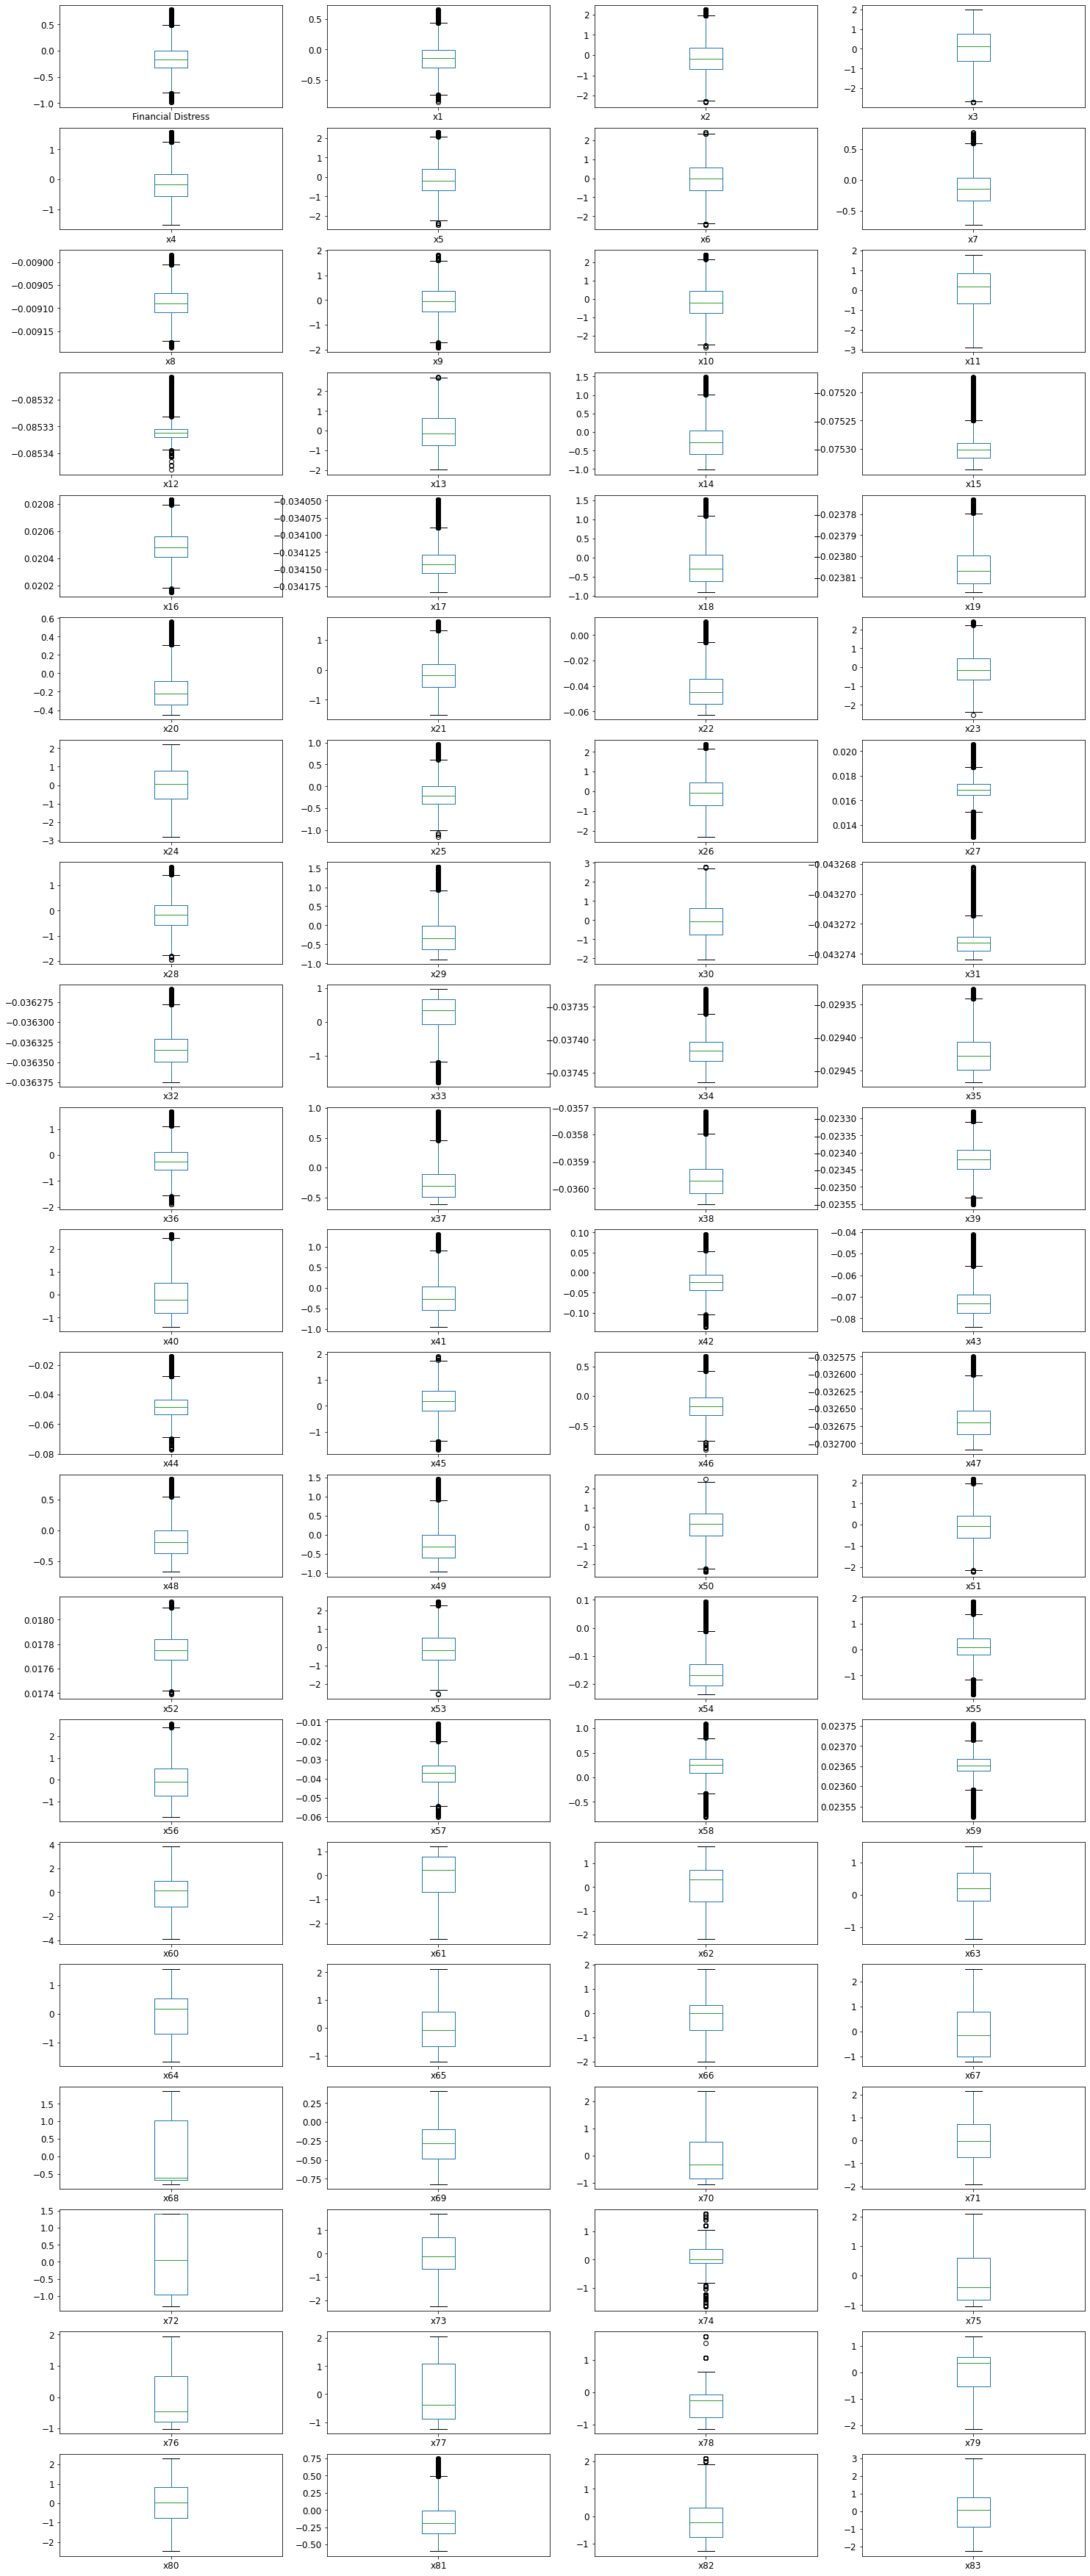

In [ ]:
df_imp.plot(kind='box', subplots=True, layout=(23,4), sharex=False, sharey=False, fontsize= 12, figsize = (25, 70))
plt.show()

## Correlation Heat Map

In [ ]:
corr_df = df_imp.corr()
corr_df = pd.DataFrame(corr_df)
corr_fd = corr_df.iloc[0, :]
corr_fd[:]

Financial Distress    1.000000
x1                    0.133653
x2                    0.431542
x3                   -0.196244
x4                    0.143110
                        ...   
x79                  -0.116288
x80                   0.046198
x81                   0.623831
x82                   0.004899
x83                   0.039325
Name: Financial Distress, Length: 84, dtype: float64

**Plotting Correlation Heatmap**

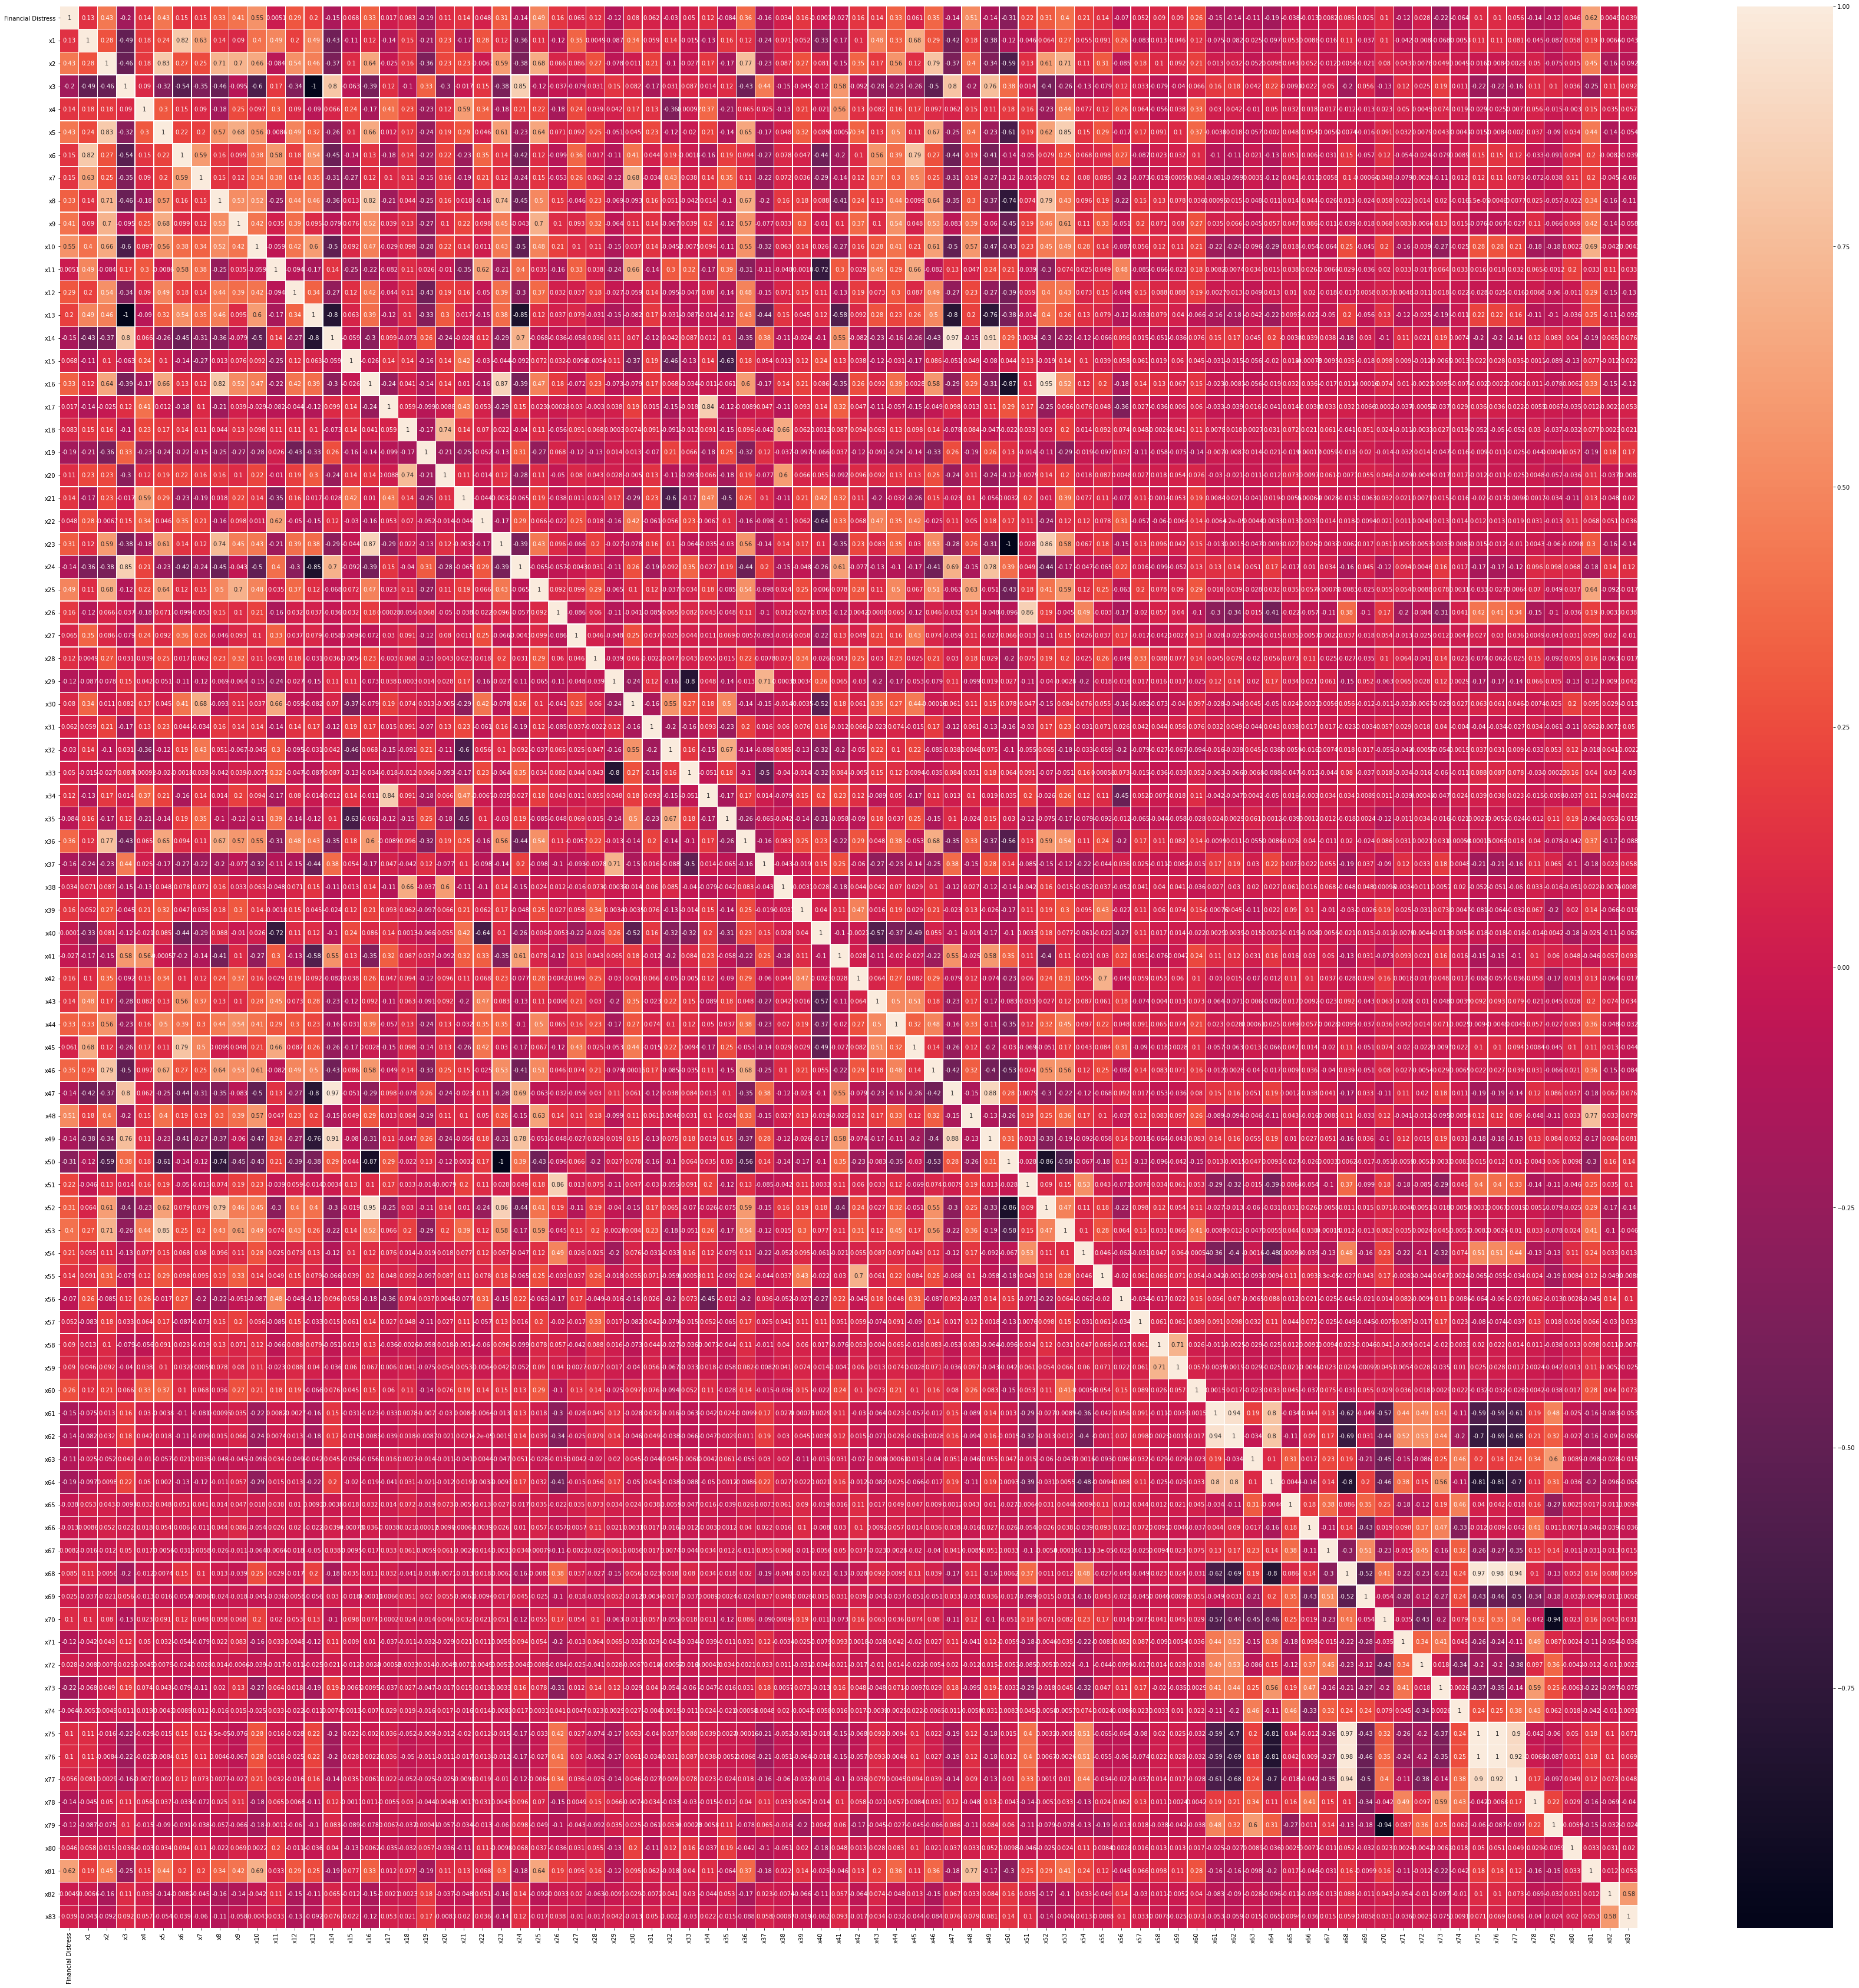

In [ ]:
fig,ax = plt.subplots(figsize = (60,60))
ax = sns.heatmap(corr_df, annot=True, linewidths=0.5)

**Barplot of correlation values of Fincaial Distress**

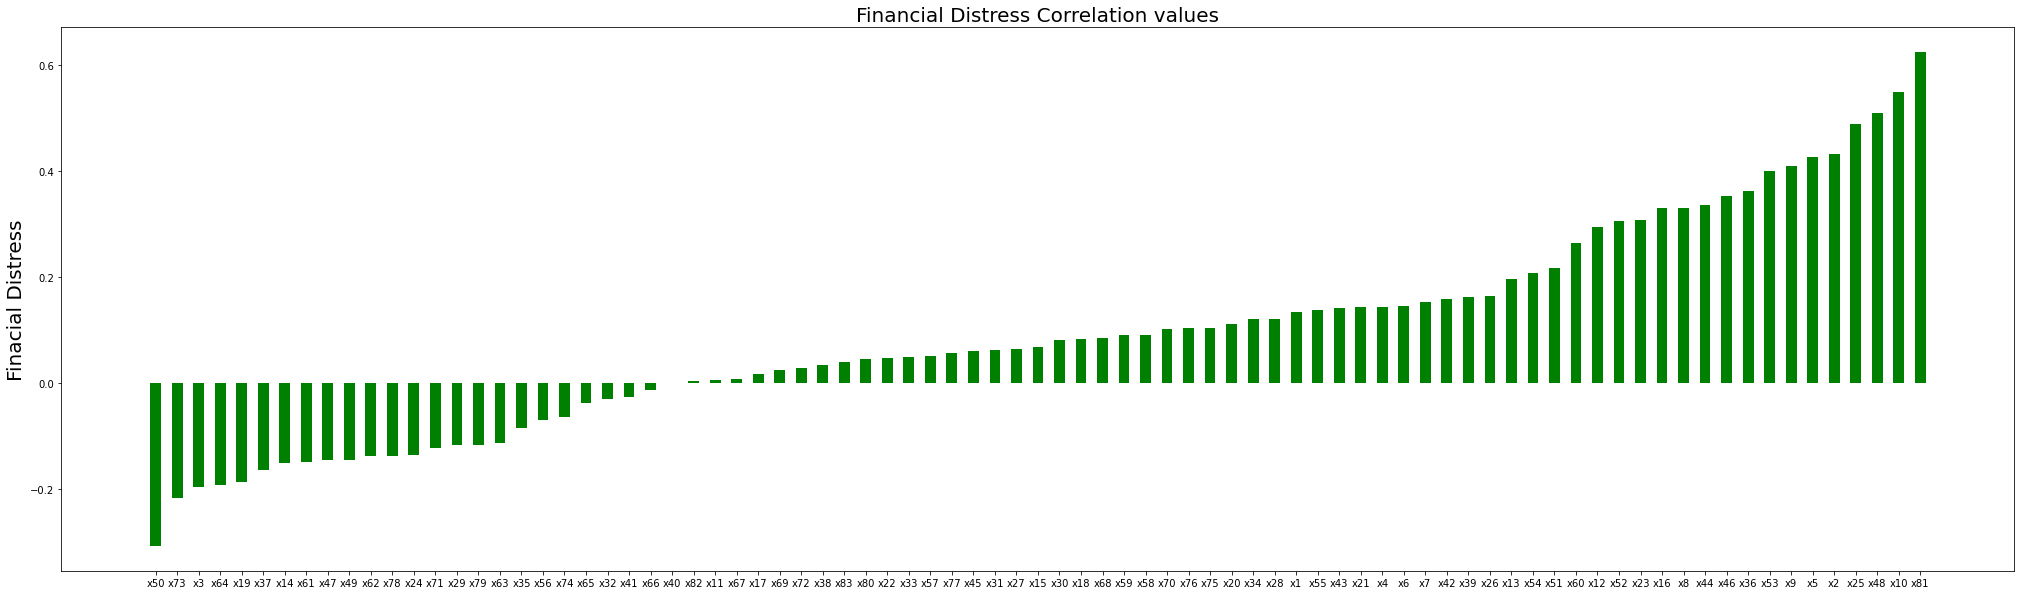

In [ ]:
plt.figure(figsize=(35,10))
plt.bar(corr_fd.sort_values().iloc[:-1].index, corr_fd.sort_values().iloc[:-1], width=0.5, align='center', color = 'g')
plt.ylabel(ylabel='Finacial Distress', size=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title(label = 'Financial Distress Correlation values', size = 20)
plt.show()

In [ ]:
## positive correlation x81,10,x48,x25,x2,x5,x16,x9,x8,x53,x23,x44,x52,x36,x46,x12,x60,x54
## negative correlation x50,x3,x64,x37,x73,61,x24,x62,x29,x19,x49

In [ ]:
#bentic
#corr_df.iloc[:3, :] ## [Row,column]-- Row0 is Financial Distress variable 
corr_GreaterThanPointFive=corr_df[(corr_df.iloc[:,:]>0.5) | (corr_df.iloc[:,:]<-0.5)]
corr_ColumnsGreaterThanPointFive=corr_GreaterThanPointFive.iloc[0].dropna()
corr_ColumnsGreaterThanPointFive

# got three features-x10,x48,x81


**Correlation Dictionary of Highlly correlated features**

In [ ]:

corr = pd.DataFrame(corr_df[(corr_df>=0.5)|(corr_df<=-0.5)])
corr_dict = {}
for f in corr.index:
  corr_dict[f] = pd.DataFrame(corr.sort_values(f)[f].dropna())
      

In [ ]:
def plot_highcorrheatmap():
  '''Function to plot highly correlated values on heatmap i.e. >0.5 & <-0.5'''
  fig,ax = plt.subplots(figsize = (50,50))
  mask = corr.isnull()
  ax = sns.heatmap(corr, annot=True, linewidths=0.5, mask = mask, cmap = "crest")


**Plotting Highly correlated Heatmap**

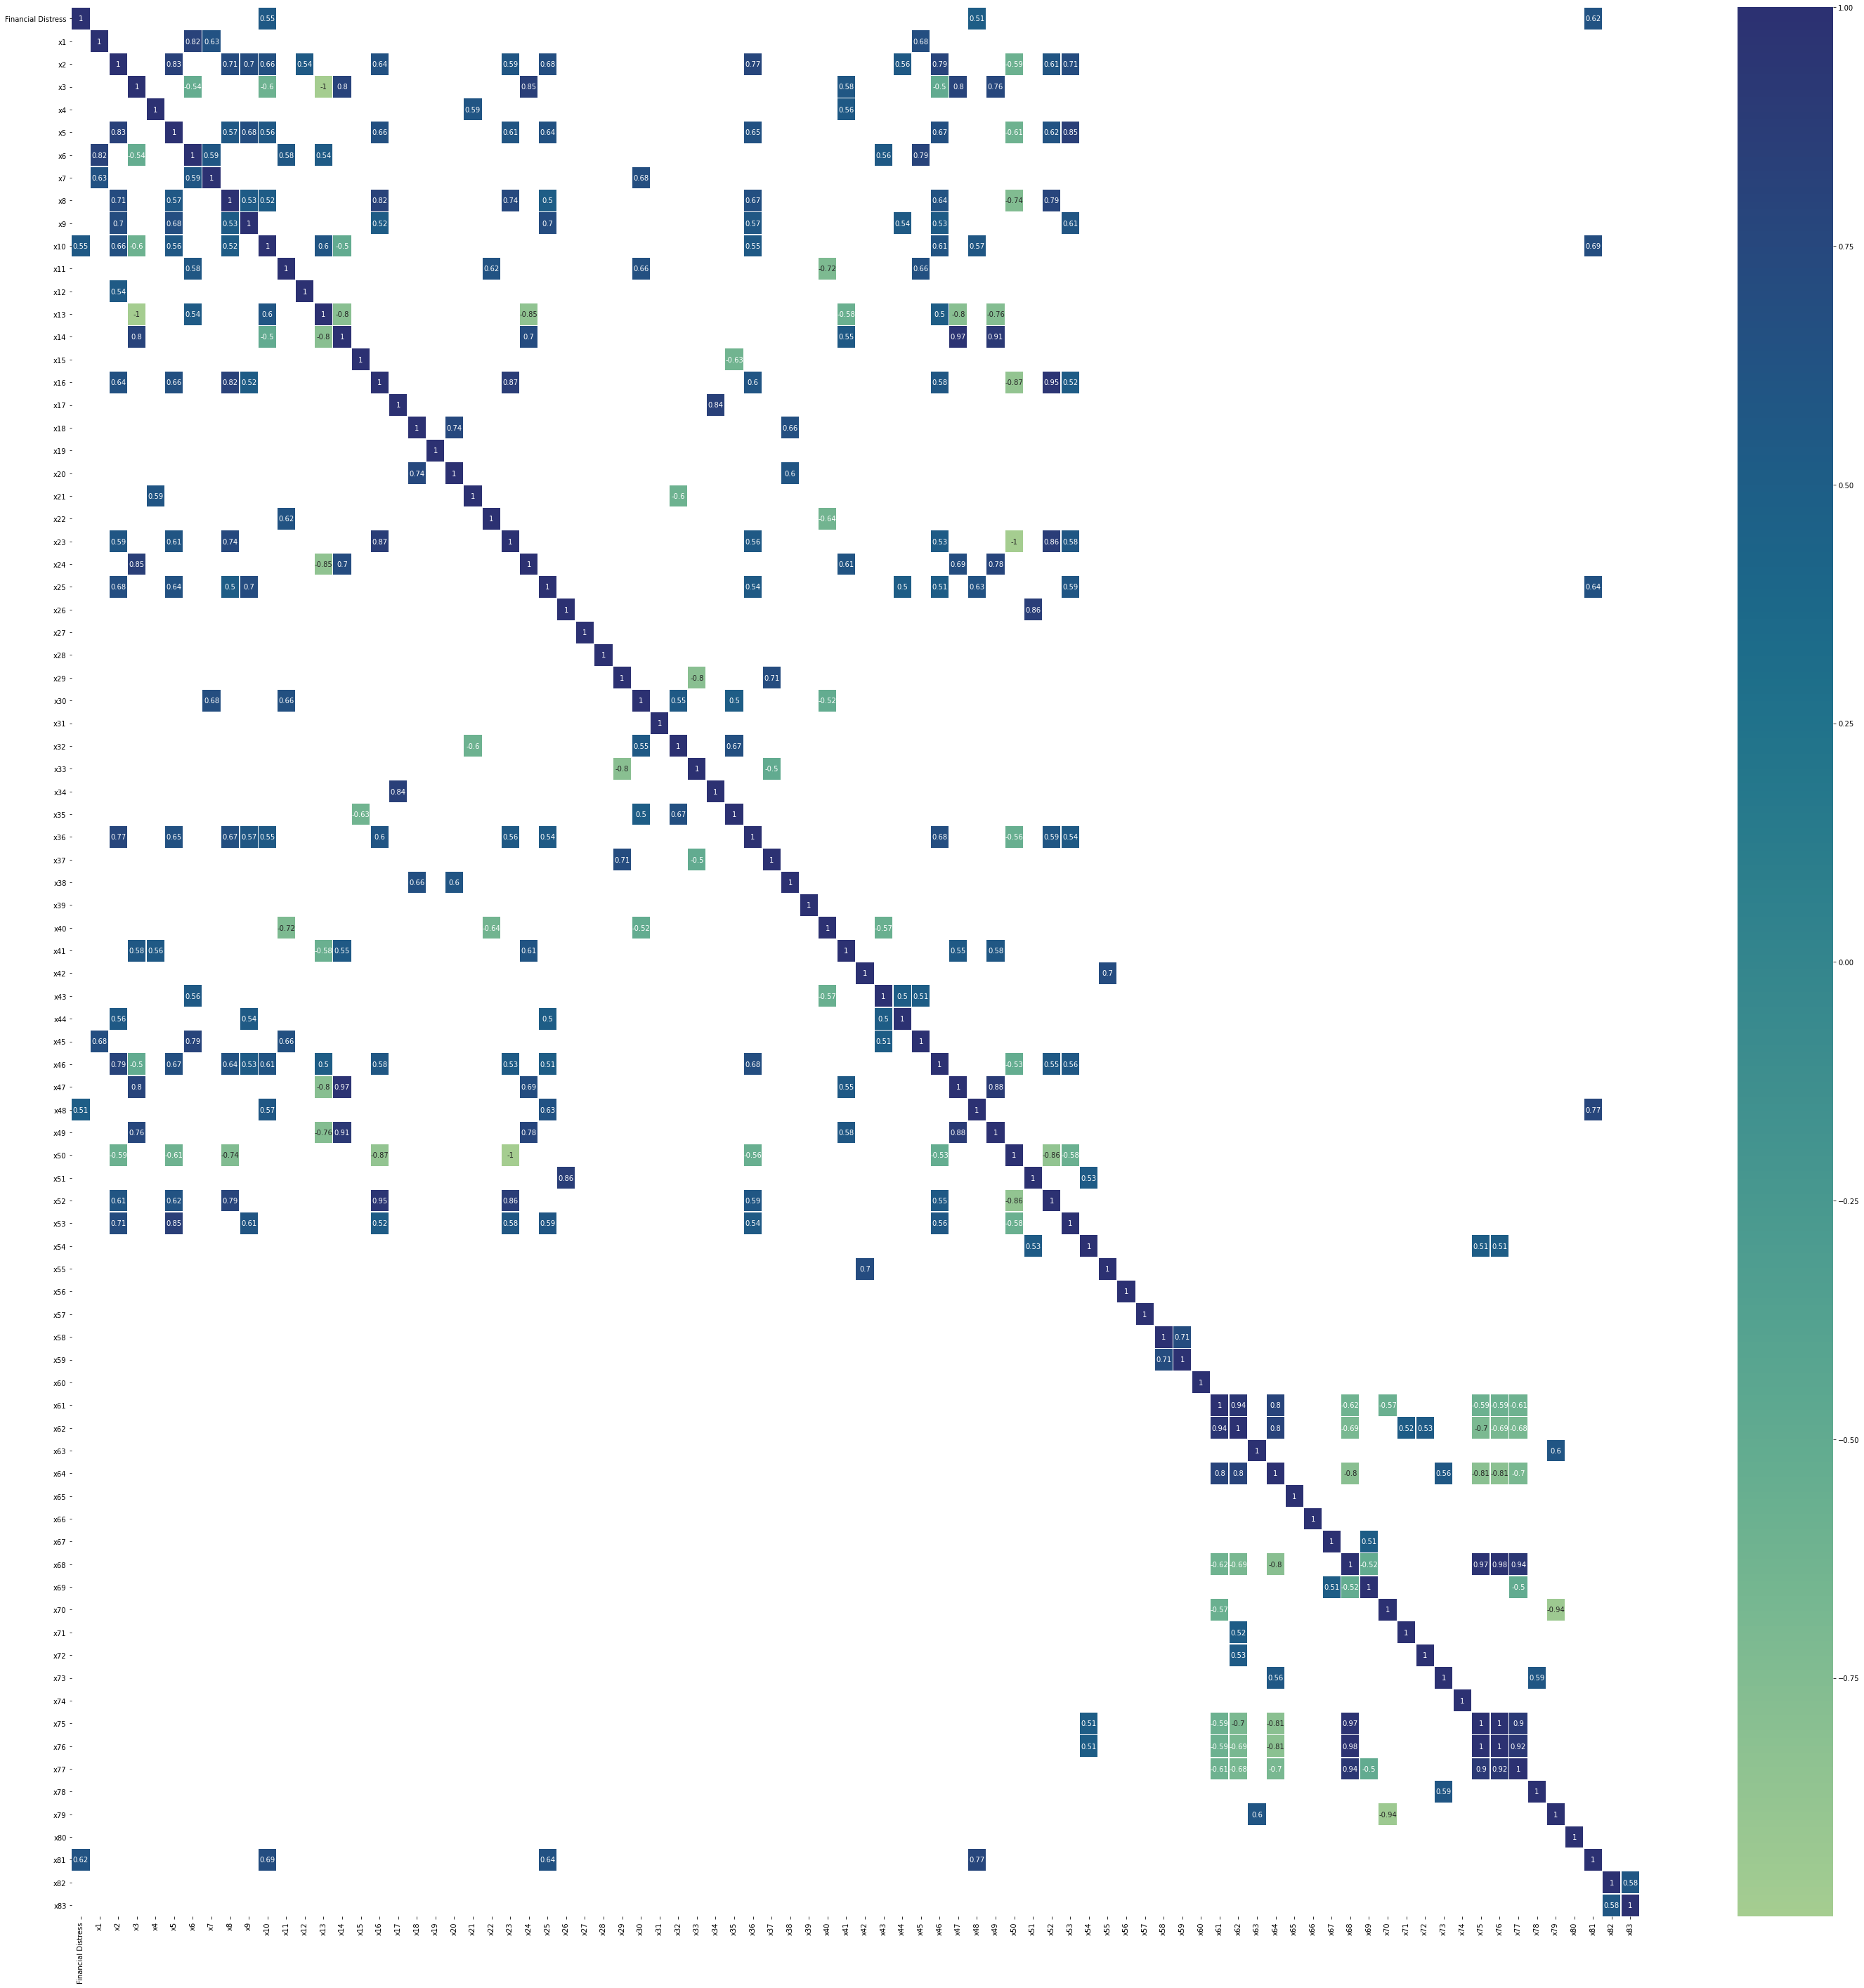

In [ ]:
plot_highcorrheatmap()


# To initialise data frame and correlated values

In [ ]:
def get_df():
  df = df = pd.read_csv('/content/Financial Distress.csv')
  df1 = df.iloc[:, 2:]
  df1 = df1.drop('x80', axis =1)      #dropping x80 because it is redundant and will have no impact on target variable because it is company specific

  scaler=StandardScaler()
  model = scaler.fit(df1)
  scaled_data=pd.DataFrame(model.transform(df1))
  scaled_data.columns=df1.columns


  Q1=scaled_data.quantile(q=0.25)
  Q3=scaled_data.quantile(q=0.75)
  IQR= Q3-Q1

  #list(zip(Q1-1.5*IQR, Q3+1.5*IQR))
  df_scaled = scaled_data[(scaled_data >=(Q1-1.5*IQR))& (scaled_data <= Q3+1.5*IQR)]

  imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
  imp_mean.fit(df_scaled)
  df_imp = pd.DataFrame(imp_mean.transform(df_scaled))
  df_imp.columns=df1.columns
  return df_imp

def get_corr(df):
  corr_df = df.corr()
  corr_df = pd.DataFrame(corr_df)
  fd_corr = corr_df.iloc[0, :] 

  corr = pd.DataFrame(corr_df[(corr_df>=0.5)|(corr_df<=-0.5)])
  corr_dict = {}
  for f in corr.index:
    corr_dict[f] = pd.DataFrame(corr.sort_values(f)[f].dropna())
  return corr_df, fd_corr, corr_dict
  

In [ ]:
df = get_df()
corr_df, fd_corr, highcorr_dict = get_corr(df)

In [ ]:
df

Financial Distress        x1        x2  ...       x81       x82       x83
0              -0.388263 -0.073530 -0.889790  ... -0.390080  1.783244  1.163525
1              -0.564217 -0.081102 -1.027125  ... -0.408740  1.888901  1.236450
2              -0.514976 -0.230545 -1.575751  ... -0.583737  1.994557  1.309375
3              -0.605923 -0.189106 -1.207824  ... -0.534764  2.100214  1.382300
4               0.119555 -0.224075 -0.189054  ...  0.056448 -0.646859 -0.440828
...                  ...       ...       ...  ...       ...       ...       ...
3667           -0.227099  0.600718  0.609885  ... -0.249068 -0.963829  0.580124
3668           -0.210360  0.394899  0.722805  ... -0.248453 -0.858173  0.653049
3669           -0.203437  0.221707  0.652220  ... -0.231805 -0.752516  0.725974
3670           -0.161858  0.117834  0.464548  ... -0.224919 -0.646859  0.798899
3671           -0.196694  0.156244  0.392129  ... -0.183567 -0.541203  0.871825

[3672 rows x 83 columns]

In [ ]:
fd_corr
highcorr_dict['Financial Distress']

Financial Distress
x48                           0.509340
x10                           0.548832
x81                           0.623831
Financial Distress            1.000000

Checking If the values are statistically significant

In [ ]:
lst = []
for feat in highcorr_dict['Financial Distress'].index:
  coef, p_val = stats.pearsonr(df['Financial Distress'], df[feat])
  lst.append([coef, p_val])
lst

[[0.5093395954508616, 1.1734712788740663e-241],
 [0.5488318290979265, 5.607281650680648e-288],
 [0.6238306345871443, 0.0],
 [1.0, 0.0]]

## Scatter Matrix 

In [ ]:
from pandas.plotting import scatter_matrix

df_scatter = pd.DataFrame(df, columns=['x10','x48','x81','Financial Distress'])
df_scatter['Financial Distress'] = df_scatter['Financial Distress'].apply(lambda X : 1 if X < -0.5 else (0 if X > -0.5 else X) )
# scatter_matrix(df_scatter, alpha=0.2,c = df_scatter['Financial Distress'], figsize=(15,10), diagonal="kde");
df_scatter['Financial Distress'].value_counts()

0    3455
1     217
Name: Financial Distress, dtype: int64

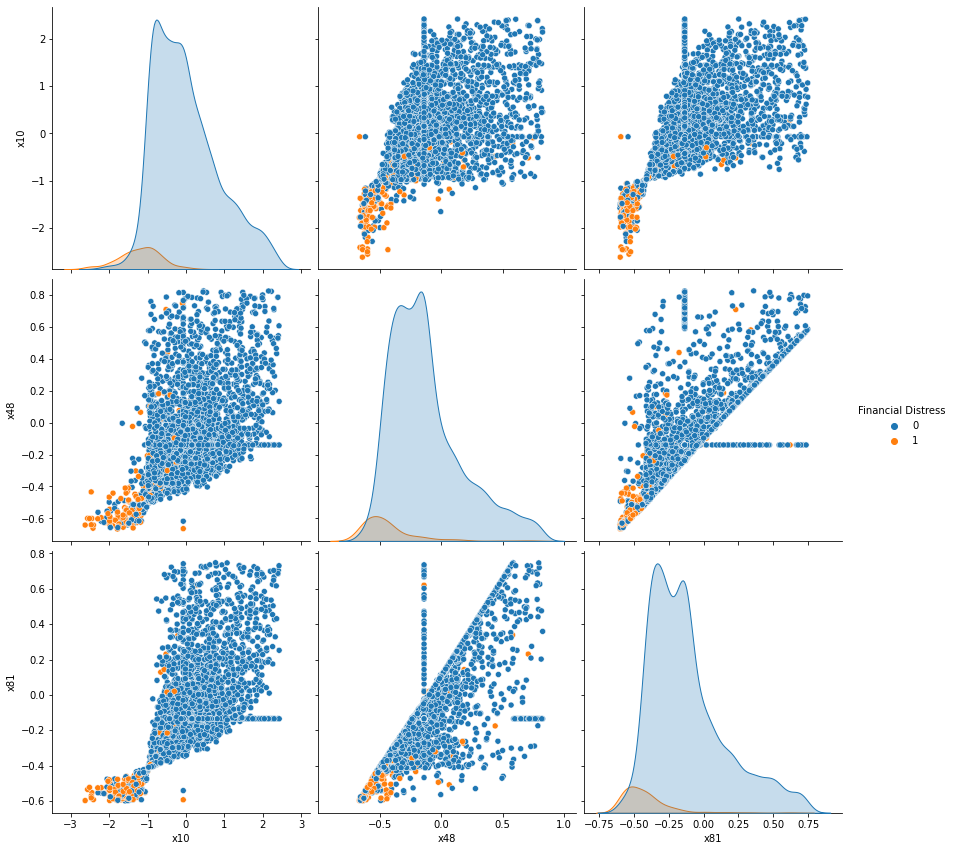

In [ ]:
sns.pairplot(df_scatter ,hue= 'Financial Distress', height= 4);

In [ ]:
x = df_scatter.iloc[:,0:3]
y = df_scatter['Financial Distress']


In [ ]:
df_scatter.shape

(3672, 4)

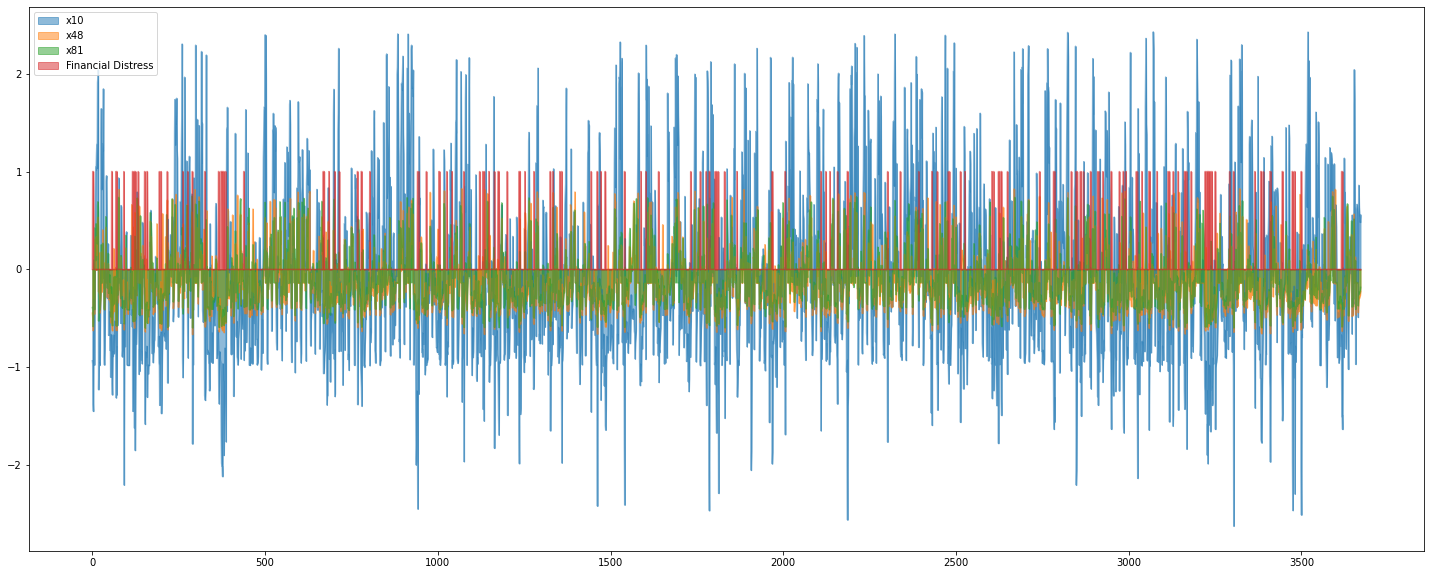

In [ ]:
#bentic-area plot
df_areaPlot=df_scatter[['x10','x48','x81','Financial Distress']]
df_areaPlot.plot.area(stacked=False,figsize=(25,10))

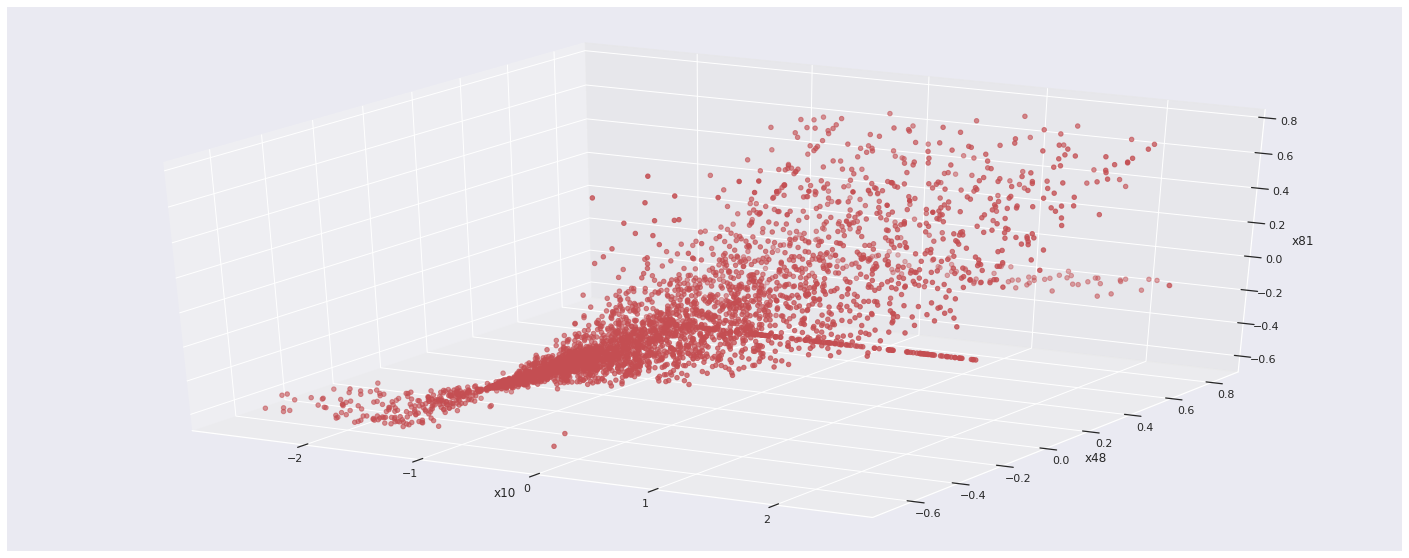

In [ ]:
#bentic - 3D Plot
from mpl_toolkits.mplot3d import Axes3D

#df = pd.read_csv('2016.csv')
sns.set(style = "darkgrid")
sns.color_palette("bright")

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111, projection = '3d')
##sty='darkgrid'
#ax.set_title('style: {!r}'.format(sty), color='C2')

#x = df_areaPlot['Financial Distress']
x = df_scatter['x10']
y = df_areaPlot['x48']
z = df_areaPlot['x81']

ax.set_xlabel("x10")
ax.set_ylabel("x48")
ax.set_zlabel("x81")

#ax.scatter(x,c='b', y, z,c='r')
ax.scatter(x, y, z, c='r', marker='o')


In [ ]:
df_fortime = pd.read_csv('/content/Financial Distress.csv')


In [ ]:
df_time = pd.DataFrame(df_fortime, columns= ['Time', 'Financial Distress'])
df_time['Financial Distress'] = df_time['Financial Distress'].apply(lambda X : 1 if X < -0.5 else 0 )


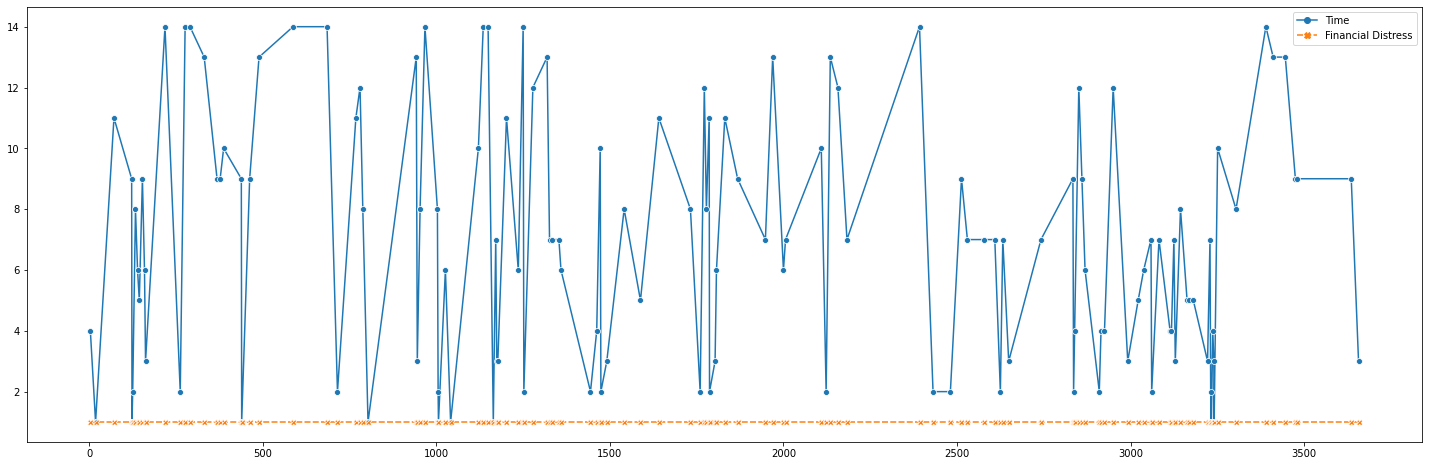

In [ ]:
df_new = df_time.loc[df_time['Financial Distress'] == 1]
# x = df_new['Time']
# y = df_new['Financial Distress']
# df_check.plot.area(stacked=False,figsize=(25,10));
plt.figure(figsize=(25,8))
sns.lineplot( data=df_new, markers=True);
